<a href="https://colab.research.google.com/github/HfzhImn/computer-vision/blob/main/Jobsheet_2_KlasifikasiGambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**JOBSHEET 02: KLASIFIKASI GAMBAR**
*Mata Kuliah: Computer Vision*

## Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


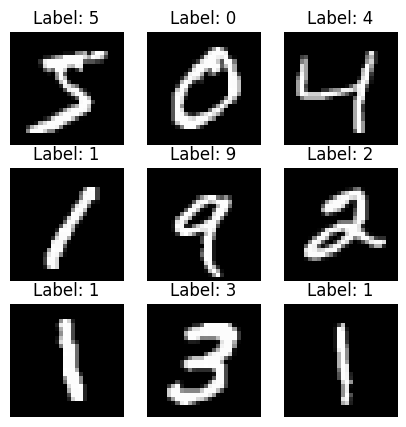

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


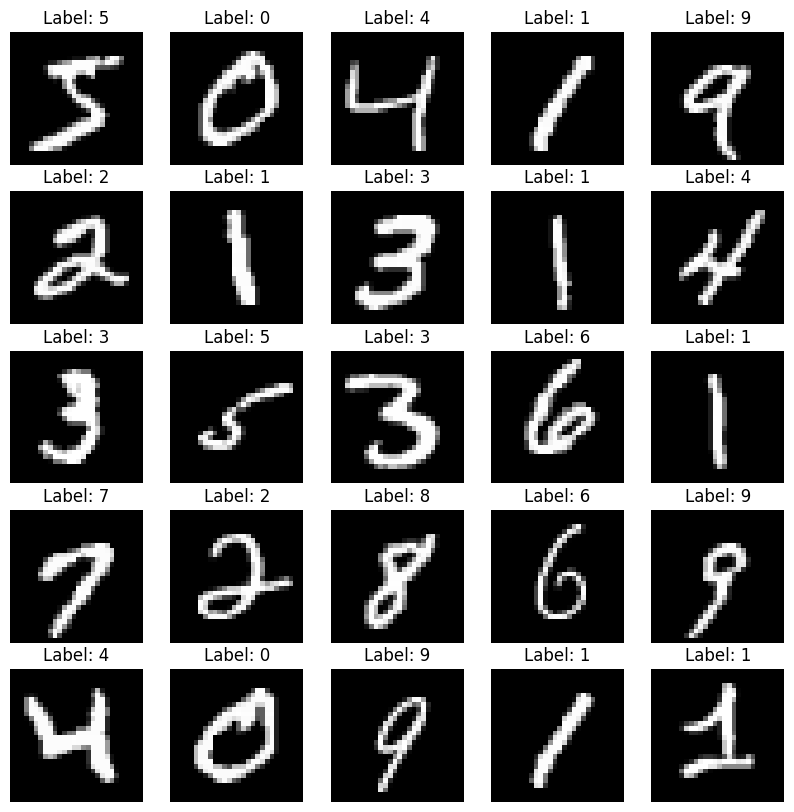

In [3]:
# Tugas Kecil
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

##Praktikum D2 Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [4]:
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [5]:
# Tugas Kecil
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale', probability=True)
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


## Praktikum D3 – Membangun CNN Sederhana


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9010 - loss: 0.3390 - val_accuracy: 0.9800 - val_loss: 0.0688
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9817 - loss: 0.0610 - val_accuracy: 0.9867 - val_loss: 0.0489
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9885 - loss: 0.0383 - val_accuracy: 0.9868 - val_loss: 0.0485
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9914 - loss: 0.0262 - val_accuracy: 0.9890 - val_loss: 0.0433
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9947 - loss: 0.0177 - val_accuracy: 0.9893 - val_loss: 0.0456


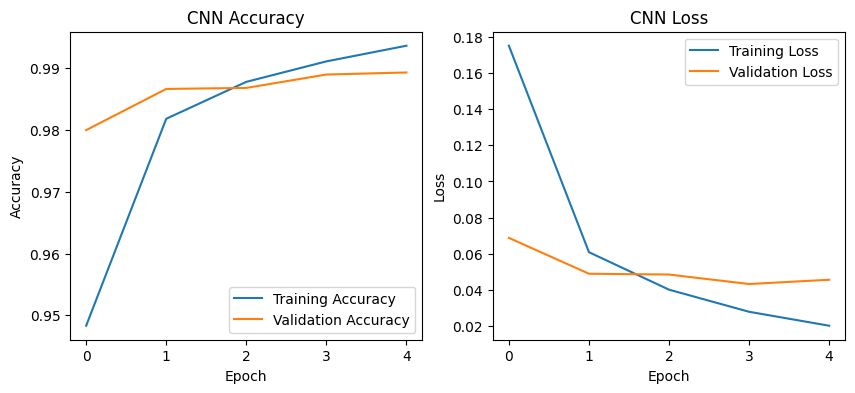

In [6]:
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.8933 - loss: 0.3505 - val_accuracy: 0.9780 - val_loss: 0.0766
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9835 - loss: 0.0527 - val_accuracy: 0.9875 - val_loss: 0.0419
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9893 - val_loss: 0.0353
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9922 - loss: 0.0238 - val_accuracy: 0.9890 - val_loss: 0.0440
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9898 - val_loss: 0.0394


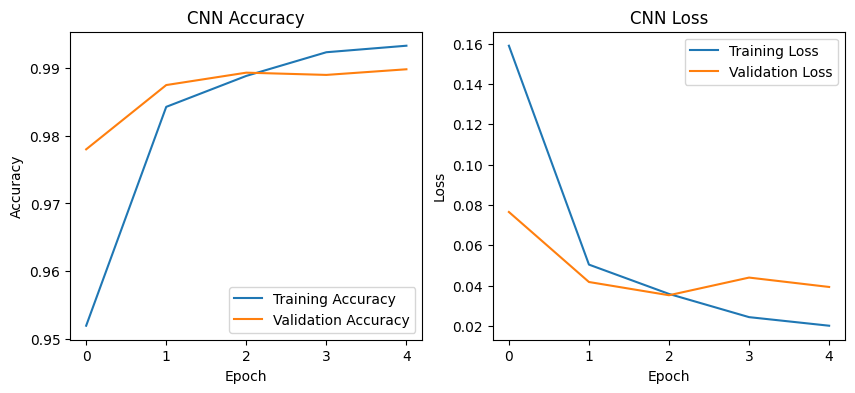

In [7]:
#Tugas Kecil
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # Blok Konvolusi Kedua (TAMBAHAN)
    # Filter digandakan menjadi 64 untuk menangkap fitur yang lebih kompleks
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Praktikum D4 Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 38ms/step - accuracy: 0.3849 - loss: 1.6922 - val_accuracy: 0.5736 - val_loss: 1.2109
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.5953 - loss: 1.1516 - val_accuracy: 0.6470 - val_loss: 1.0157
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.6604 - loss: 0.9783 - val_accuracy: 0.6798 - val_loss: 0.9381
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.6972 - loss: 0.8735 - val_accuracy: 0.6872 - val_loss: 0.9037
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7226 - loss: 0.7984 - val_accuracy: 0.7050 - val_loss: 0.8765
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.7472 - loss: 0.7223 - val_accuracy: 0.6918 - val_loss: 0.9222
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7650 - loss: 0.6738 - val_accuracy: 0.7078 - val_loss: 0.8738
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7823 -

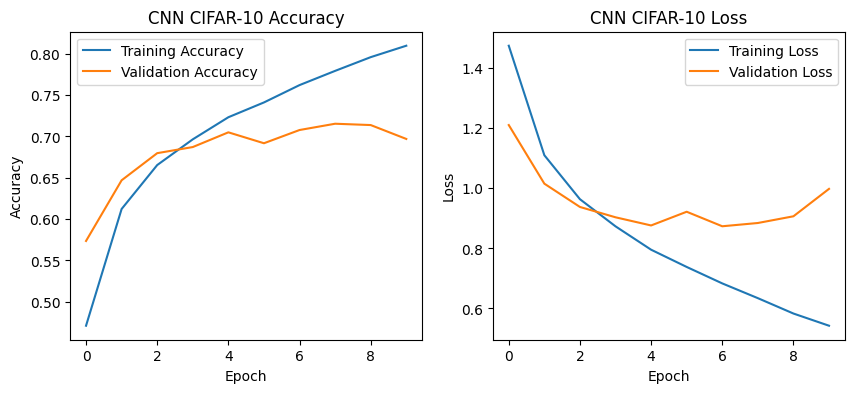

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 42ms/step - accuracy: 0.2781 - loss: 1.9352 - val_accuracy: 0.5252 - val_loss: 1.3620
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.4450 - loss: 1.5072 - val_accuracy: 0.5652 - val_loss: 1.2393
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.5077 - loss: 1.3620 - val_accuracy: 0.6004 - val_loss: 1.1571
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.5417 - loss: 1.2758 - val_accuracy: 0.6390 - val_loss: 1.0374
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.5687 - loss: 1.1983 - val_accuracy: 0.6582 - val_loss: 0.9938
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.5857 - loss: 1.1515 - val_accuracy: 0.6692 - val_loss: 0.9729
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.5993 - loss: 1.1206 - val_accuracy: 0.6634 - val_loss: 0.9755
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6106 -

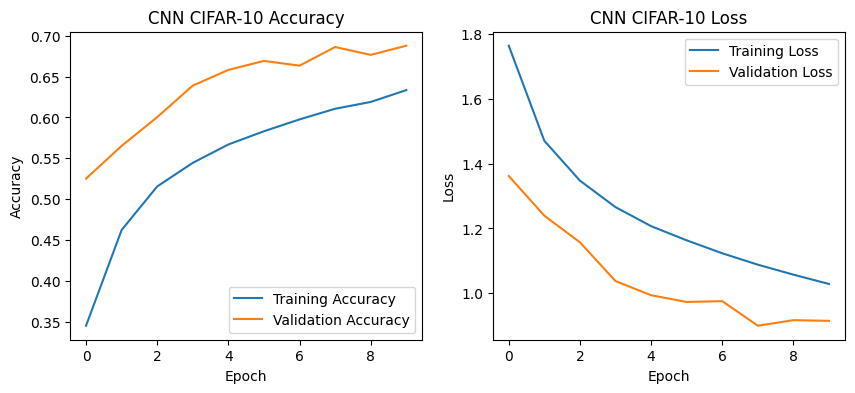

In [ ]:
# Tugas Kecil
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Praktikum D5 Transfer Learning dengan Model Pra-Latih


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 548s 388ms/step - accuracy: 0.4608 - loss: 1.5412 - val_accuracy: 0.5684 - val_loss: 1.2253
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 544s 387ms/step - accuracy: 0.5757 - loss: 1.2073 - val_accuracy: 0.5950 - val_loss: 1.1618
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 565s 389ms/step - accuracy: 0.6003 - loss: 1.1420 - val_accuracy: 0.6020 - val_loss: 1.1321
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 544s 387ms/step - accuracy: 0.6141 - loss: 1.0974 - val_accuracy: 0.6096 - val_loss: 1.1169
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 545s 387ms/step - accuracy: 0.6269 - loss: 1.0622 - val_accuracy: 0.6116 - val_loss: 1.0985


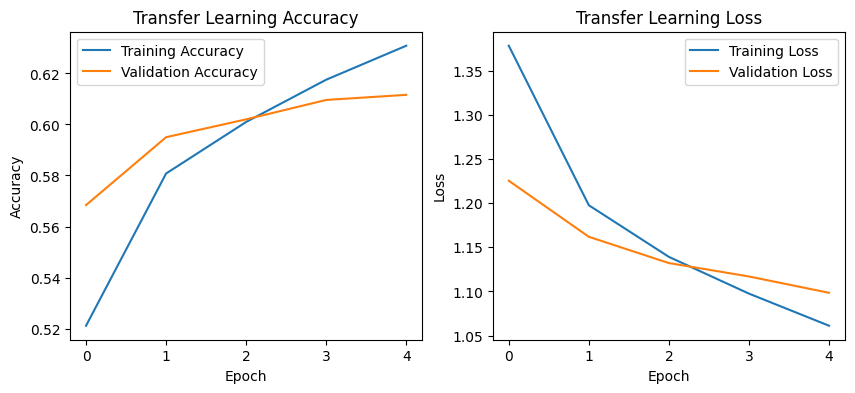

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Tugas Kecil
# --- TAHAP 2: Lakukan Fine-Tuning ---
print("\n--- Memulai Tahap Fine-Tuning ---")

# Buka 'kunci' (unfreeze) base_model
base_model.trainable = True

# Bekukan semua lapisan KECUALI blok konvolusi terakhir (block5)
# VGG16 memiliki 19 lapisan. Kita akan bekukan 15 lapisan pertama.
for layer in base_model.layers[:15]:
    layer.trainable = False

# Cek status lapisan untuk memastikan
# for layer in base_model.layers:
#     print(layer.name, layer.trainable)

# Compile ulang model dengan LEARNING RATE RENDAH
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5), # Ini sangat penting!
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Lanjutkan pelatihan untuk beberapa epoch lagi
# Kita mulai dari epoch terakhir training sebelumnya
fine_tune_epochs = 5
total_epochs = 5 + fine_tune_epochs

history_fine = model.fit(x_train, y_train,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1] + 1, # Melanjutkan epoch
                         validation_split=0.1)


--- Memulai Tahap Fine-Tuning ---
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2271s 2s/step - accuracy: 0.6621 - loss: 0.9619 - val_accuracy: 0.6740 - val_loss: 0.9299
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2300s 2s/step - accuracy: 0.7365 - loss: 0.7530 - val_accuracy: 0.6968 - val_loss: 0.8706
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2282s 2s/step - accuracy: 0.7736 - loss: 0.6439 - val_accuracy: 0.7054 - val_loss: 0.8571
Epoch 9/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2309s 2s/step - accuracy: 0.8069 - loss: 0.5542 - val_accuracy: 0.7176 - val_loss: 0.8452
Epoch 10/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2371s 2s/step - accuracy: 0.8399 - loss: 0.4715 - val_accuracy: 0.7236 - val_loss: 0.8359


##Praktikum D6 Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 103s 329ms/step
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1000
           1       0.84      0.76      0.80      1000
           2       0.70      0.61      0.65      1000
           3       0.51      0.59      0.55      1000
           4       0.70      0.65      0.67      1000
           5       0.62      0.62      0.62      1000
           6       0.70      0.78      0.74      1000
           7       0.81      0.75      0.78      1000
           8       0.82      0.82      0.82      1000
           9       0.75      0.77      0.76      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



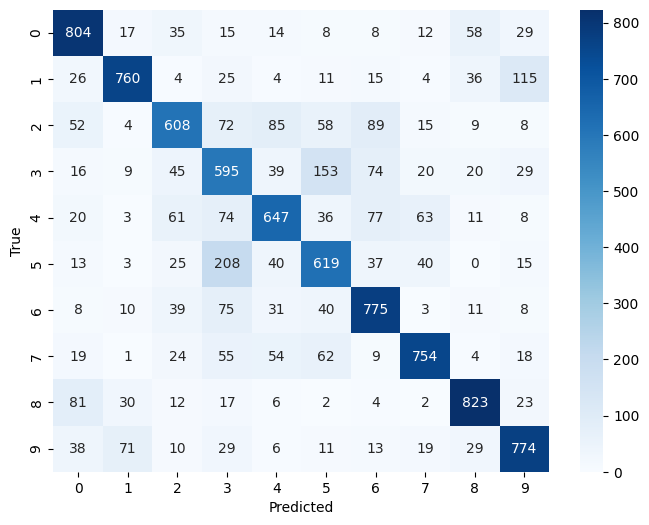

In [14]:
y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# PENUGASAN

Mencoba klasifikasi tulisan angka:  
•	Tulis 1–3 digit (0–9) di kertas putih dengan spidol/bolpen tebal (ukuran besar, kontras jelas).

•	Foto lurus dari atas, pencahayaan merata, tanpa bayangan besar.

•	Upload foto ke Google Colab.

•	Pre-process gambar agar sesuai format MNIST (28×28, grayscale).

•	Klasifikasi dengan salah satu model:

o 	CNN (D3) → butuh tensor shape (1, 28, 28, 1)

o 	SVM (D2) → butuh vektor 784 (flatten 28×28) Catatan penting:

Jalankan dulu praktikum D2 (untuk clf SVM) atau D3 (untuk model CNN) sehingga objek model sudah ada di memori notebook. Pilih salah satu sesuai yang Anda gunakan.


In [8]:
#Kode Upload & Pre-process
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """

    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit jadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]

    return canvas, arr


Saving Gambar Angka 2.jpg to Gambar Angka 2.jpg
Saving Gambar Angka 5.jpg to Gambar Angka 5.jpg
Saving Gambar Angka 7.jpg to Gambar Angka 7.jpg


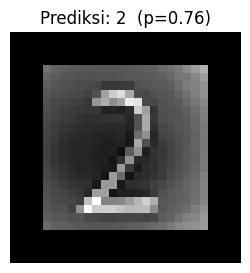

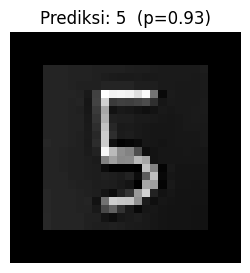

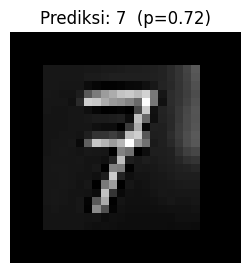

Rekap Prediksi (CNN):
- Gambar Angka 2.jpg -> 2 (p=0.760)
- Gambar Angka 5.jpg -> 5 (p=0.934)
- Gambar Angka 7.jpg -> 7 (p=0.720)


In [9]:
# Prediksi dengan Model CNN (dari D3)
import matplotlib.pyplot as plt

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)            # (1,28,28,1)

    probs = model.predict(x_batch, verbose=0)[0]   # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred}  (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


In [10]:
# Prediksi SVM dari D2
from sklearn.metrics import accuracy_score

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)   # x: (28,28,1) float [0,1]
    x_flat = x.reshape(1, -1)                   # (1,784)

    pred = int(clf.predict(x_flat)[0])

    # SVM default tidak punya proba kecuali SVC(probability=True).
    # Jika Anda ingin probabilitas:
    # clf = svm.SVC(kernel='rbf', gamma='scale', probability=True) saat pelatihan.
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass

    results.append((fname, pred, conf))

    # Tampilkan hasil (gunakan gambar 28x28 yang sudah diproses di tahap CNN juga boleh)
    print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p≈{conf:.2f})" if conf is not None else ""))


Gambar Angka 2.jpg -> Prediksi SVM: 2 (p≈0.65)
Gambar Angka 5.jpg -> Prediksi SVM: 5 (p≈0.44)
Gambar Angka 7.jpg -> Prediksi SVM: 5 (p≈0.18)
